<a href="https://colab.research.google.com/github/1eetnals/coursera-tfcertificate/blob/main/C3_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
#tokenizer -> fit_on_texts -> word_index -> texts_to_sequences -> pad_sequences 이순으로 똑같이 진행된단거 보면됌

tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()
#print(data[0:10])
corpus = data.lower().split("\n")   #'\n'단위로 끊어서 소문자로 변형시켜 저장
#print(corpus[0])

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]  #tokenizer.text_to_sequences : [[34, 417, 877, 166, 213, 517]]
	#token_list : [34, 417, 877, 166, 213, 517]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
		#input_sequences : [[34, 417], [34, 417, 877], [34, 417, 877, 166], [34, 417, 877, 166, 213], [34, 417, 877, 166, 213, 517]] 다음과 같이 출력됌


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
#print(input_sequences) : 
"""[[   0    0    0 ...    0   34  417]
 [   0    0    0 ...   34  417  877]
 [   0    0    0 ...  417  877  166]
 ...
 [   0    0    0 ...  493  493 3210]
 [   0    0    0 ...  493 3210   15]
 [   0    0    0 ... 3210   15   14]]"""


# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
#print(predictors):
"""[[   0    0    0 ...    0    0   34]
 [   0    0    0 ...    0   34  417]
 [   0    0    0 ...   34  417  877]
 ...
 [   0    0    0 ... 3209  493  493]
 [   0    0    0 ...  493  493 3210]
 [   0    0    0 ...  493 3210   15]]"""
#print(label):
"""
[ 417  877  166 ... 3210   15   14]"""

label = ku.to_categorical(label, num_classes=total_words)
#to_categorical 함수 : one-hot encoding해주는 함수 (클래스 벡터(정수)를 이진 클래스 행렬로 변환)
#y=label: 행렬로 변환할 클래스 벡터 (0부터 num_classes까지의 정수)
#num_classes: 클래스의 총 개수.
#dtype: 문자열로 표현된 인풋의 데이터 자료형 (float32, float64, int32...)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 72.0MB/s]


In [ ]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))# Your Embedding Layer)
#total_words : 3211, input_length = 11-1=10
model.add(Bidirectional(LSTM(150, return_sequences = True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))# A Dense Layer)
# Pick an optimizer
# #모델학습과정설명
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
### END CODE HERE

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           321100    
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 300)          301200    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 300)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 1605)              162105    
                                                                 
 dense_3 (Dense)             (None, 3211)              5156866   
                                                      

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)
 # 모델 학습시키기

Epoch 1/100
484/484 [==============================] - 21s 26ms/step - loss: 6.9093 - accuracy: 0.0231
Epoch 2/100
484/484 [==============================] - 13s 27ms/step - loss: 6.4999 - accuracy: 0.0229
Epoch 3/100
484/484 [==============================] - 13s 27ms/step - loss: 6.4107 - accuracy: 0.0244
Epoch 4/100
484/484 [==============================] - 13s 27ms/step - loss: 6.2928 - accuracy: 0.0306
Epoch 5/100
484/484 [==============================] - 13s 26ms/step - loss: 6.1967 - accuracy: 0.0324
Epoch 6/100
484/484 [==============================] - 13s 26ms/step - loss: 6.1134 - accuracy: 0.0387
Epoch 7/100
484/484 [==============================] - 13s 26ms/step - loss: 6.0395 - accuracy: 0.0393
Epoch 8/100
484/484 [==============================] - 13s 26ms/step - loss: 5.9616 - accuracy: 0.0445
Epoch 9/100
484/484 [==============================] - 13s 27ms/step - loss: 5.8667 - accuracy: 0.0497
Epoch 10/100
484/484 [==============================] - 13s 27ms/step - l

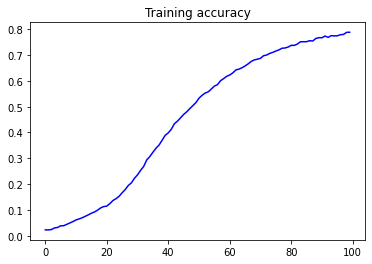

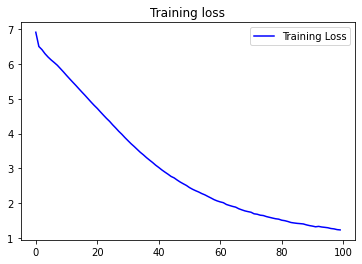

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy') #x,y,색깔, legend취할때 이름
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

AttributeError: ignored